# Driving

In [51]:
from astropy import units
from astropy.constants import g0
from matplotlib import pyplot as plt
from uuid import uuid4

from dpd.driving import Route, Schedule, Trip, Vehicles
from dpd.modeling import TransportationModel
from dpd.mechanics.datacollection import DYNAMIC_BODY_AGENT_REPORTERS

units.imperial.enable()
mu = 0.25  # https://railroads.dot.gov/sites/fra.dot.gov/files/fra_net/17468/A%20Survey%20of%20Wheel-Rail%20Friction.pdf

In [60]:
model = TransportationModel(
    time_unit=units.second / 100,
    agent_reporters=DYNAMIC_BODY_AGENT_REPORTERS
    | {"name": "stop_name", "dwell_time": "dwell_time"},
)

relations = {
    "expo_line_west": 2351006,
    "blue_line_north": 2351005,
    "c_line_east": 2377889,
    "s1_ost_flug": 1773071,
    "bart_red_south": 2851509,
    "caltrain_local": 2768041,
    "san_bernardino_line": 1287719,
    "orange_county_line": 2812899,
    "ca_hsr": 7739486,
}

relation = relations["san_bernardino_line"]

if relation == relations["bart_red_south"]:
    gague = 1.676 * units.meter
else:
    gague = 1.435 * units.meter


vehicles = Vehicles(
    url="https://raw.githubusercontent.com/davidbailey/Notes/trunk/Trains.csv",
    vehicle="Kinkisharyo P3010",
)

Dropdown(description='Vehicle', options=('Brookville Liberty Modern Streetcar', 'Kinkisharyo P3010', 'Siemens …

In [61]:
route = Route.from_osm_relation(relation=relation, gague=gague)

for name in [
    "San Bernardino–Downtown",
    "Rialto",
    "Fontana",
    "Upland",
    "Claremont",
    "Pomona–North",
    "Baldwin Park",
    "El Monte",
]:
    route.remove_stop(name)

In [62]:
route.stops

,geometry,name
3,POINT (-117.18329 34.05904),Redlands–Downtown
275,POINT (-117.30941 34.10442),San Bernardino Depot
489,POINT (-117.55880 34.09192),Rancho Cucamonga
597,POINT (-117.69469 34.09390),Montclair
769,POINT (-117.88803 34.09206),Covina
1065,POINT (-118.16815 34.06266),Cal State LA
1278,POINT (-118.23438 34.05434),Los Angeles Union Station


In [63]:
segments = route.segments(dwell_time=45 * units.second)

vehicle = vehicles.vehicle(
    segments=segments,
    model=model,
    unique_id=uuid4(),
    initial_acceleration=mu * g0,
    max_acceleration=mu * g0,
    max_deceleration=1 * units.meter / units.second**2,
    initial_position=0 * units.meter,
    initial_velocity=0 * units.meter / units.second,
)

model.schedule.add(vehicle)

In [64]:
model.run()

In [65]:
df = model.get_dataframe()
df

,,position,velocity,acceleration,name,dwell_time,time
Step,AgentID,,,,,,
0,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,0.0 m,0.0 m / s,2.4516625 m / s2,None,0.01 s,0.0 s
1,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,0.0 m,0.0 m / s,2.4516625 m / s2,Redlands–Downtown,45.0 s,0.01 s
2,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,0.0 m,0.0 m / s,2.4516625 m / s2,Redlands–Downtown,44.99 s,0.02 s
3,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,0.0 m,0.0 m / s,2.4516625 m / s2,Redlands–Downtown,44.980000000000004 s,0.03 s
4,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,0.0 m,0.0 m / s,2.4516625 m / s2,Redlands–Downtown,44.970000000000006 s,0.04 s
...,...,...,...,...,...,...,...
546467,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,101562.35988472715 m,0.0 m / s,-1.0 m / s2,Los Angeles Union Station,0.040000000000382056 s,5464.67 s
546468,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,101562.35988472715 m,0.0 m / s,-1.0 m / s2,Los Angeles Union Station,0.030000000000382054 s,5464.68 s
546469,b3c2e850-2bb4-42b4-8cb0-61ab5365863f,101562.35988472715 m,0.0 m / s,-1.0 m / s2,Los Angeles Union Station,0.020000000000382052 s,5464.6900000000005 s


In [66]:
trip = Trip.from_model(df, route, include_geometry=False)

/usr/local/lib/python3.9/site-packages/dpd/driving/trip.py:109: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  return Trip(GeoDataFrame(df, crs=route.crs)[columns])


In [67]:
trip.stops

timedelta  \
Stop                      Arriva/Departure                          
Redlands–Downtown         Arrival          0 days 00:00:00.010000   
                          Departure        0 days 00:00:45.010000   
San Bernardino Depot      Arrival          0 days 00:13:55.570000   
                          Departure        0 days 00:14:40.570000   
Rancho Cucamonga          Arrival          0 days 00:34:06.410000   
                          Departure        0 days 00:34:51.410000   
Montclair                 Arrival          0 days 00:44:56.020000   
                          Departure        0 days 00:45:41.020000   
Covina                    Arrival          0 days 01:00:18.820000   
                          Departure        0 days 01:01:03.820000   
Cal State LA              Arrival          0 days 01:22:31.030000   
                          Departure        0 days 01:23:16.030000   
Los Angeles Union Station Arrival          0 days 01:30:19.710000   
                          Departure        0 days 01:31:04.710000   

                                                                 name  \
Stop                      Arriva/Departure                              
Redlands–Downtown         Arrival                   Redlands–Downtown   
                          Departure                 Redlands–Downtown   
San Bernardino Depot      Arrival                San Bernardino Depot   
                          Departure              San Bernardino Depot   
Rancho Cucamonga          Arrival                    Rancho Cucamonga   
                          Departure                  Rancho Cucamonga   
Montclair                 Arrival                           Montclair   
                          Departure                         Montclair   
Covina                    Arrival                              Covina   
                          Departure                            Covina   
Cal State LA              Arrival                        Cal State LA   
                          Departure                      Cal State LA   
Los Angeles Union Station Arrival           Los Angeles Union Station   
                          Departure         Los Angeles Union Station   

                                           total_time        total_distance  
Stop                      Arriva/Departure                                   
Redlands–Downtown         Arrival              0.01 s                 0.0 m  
                          Departure           45.01 s                 0.0 m  
San Bernardino Depot      Arrival            835.57 s  14073.403032277936 m  
                          Departure          880.57 s  14073.403032277936 m  
Rancho Cucamonga          Arrival           2046.41 s   36210.65161025482 m  
                          Departure         2091.41 s   36210.65161025482 m  
Montclair                 Arrival           2696.02 s  48160.367157930974 m  
                          Departure         2741.02 s  48160.367157930974 m  
Covina                    Arrival           3618.82 s   65483.36896468303 m  
                          Departure         3663.82 s   65483.36896468303 m  
Cal State LA              Arrival           4951.03 s   94261.77078719845 m  
                          Departure         4996.03 s   94261.77078719845 m  
Los Angeles Union Station Arrival           5419.71 s  101562.35988472715 m  
                          Departure         5464.71 s  101562.35988472715 m

In [ ]:
6114.0 - 5519.9

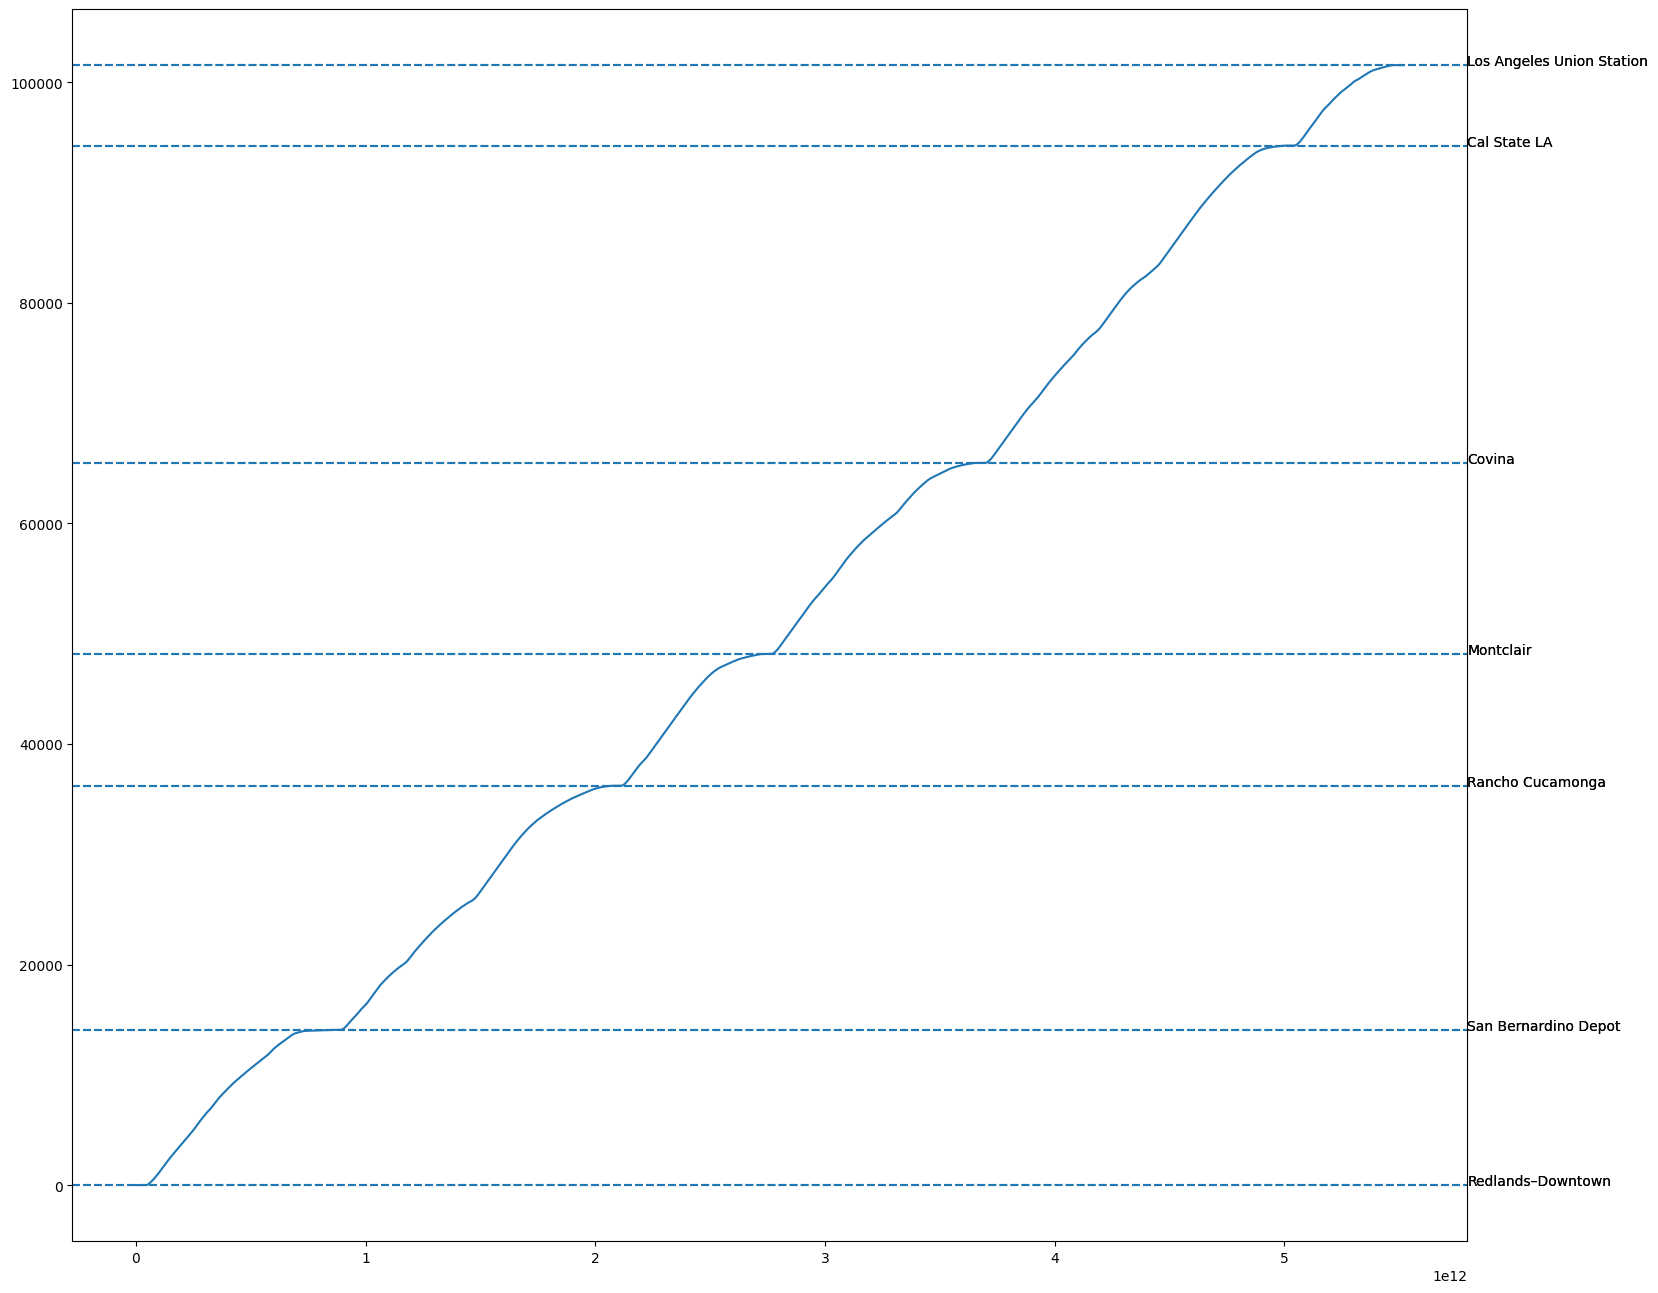

In [10]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
trip.plot_schedule(ax=ax)
plt.show()

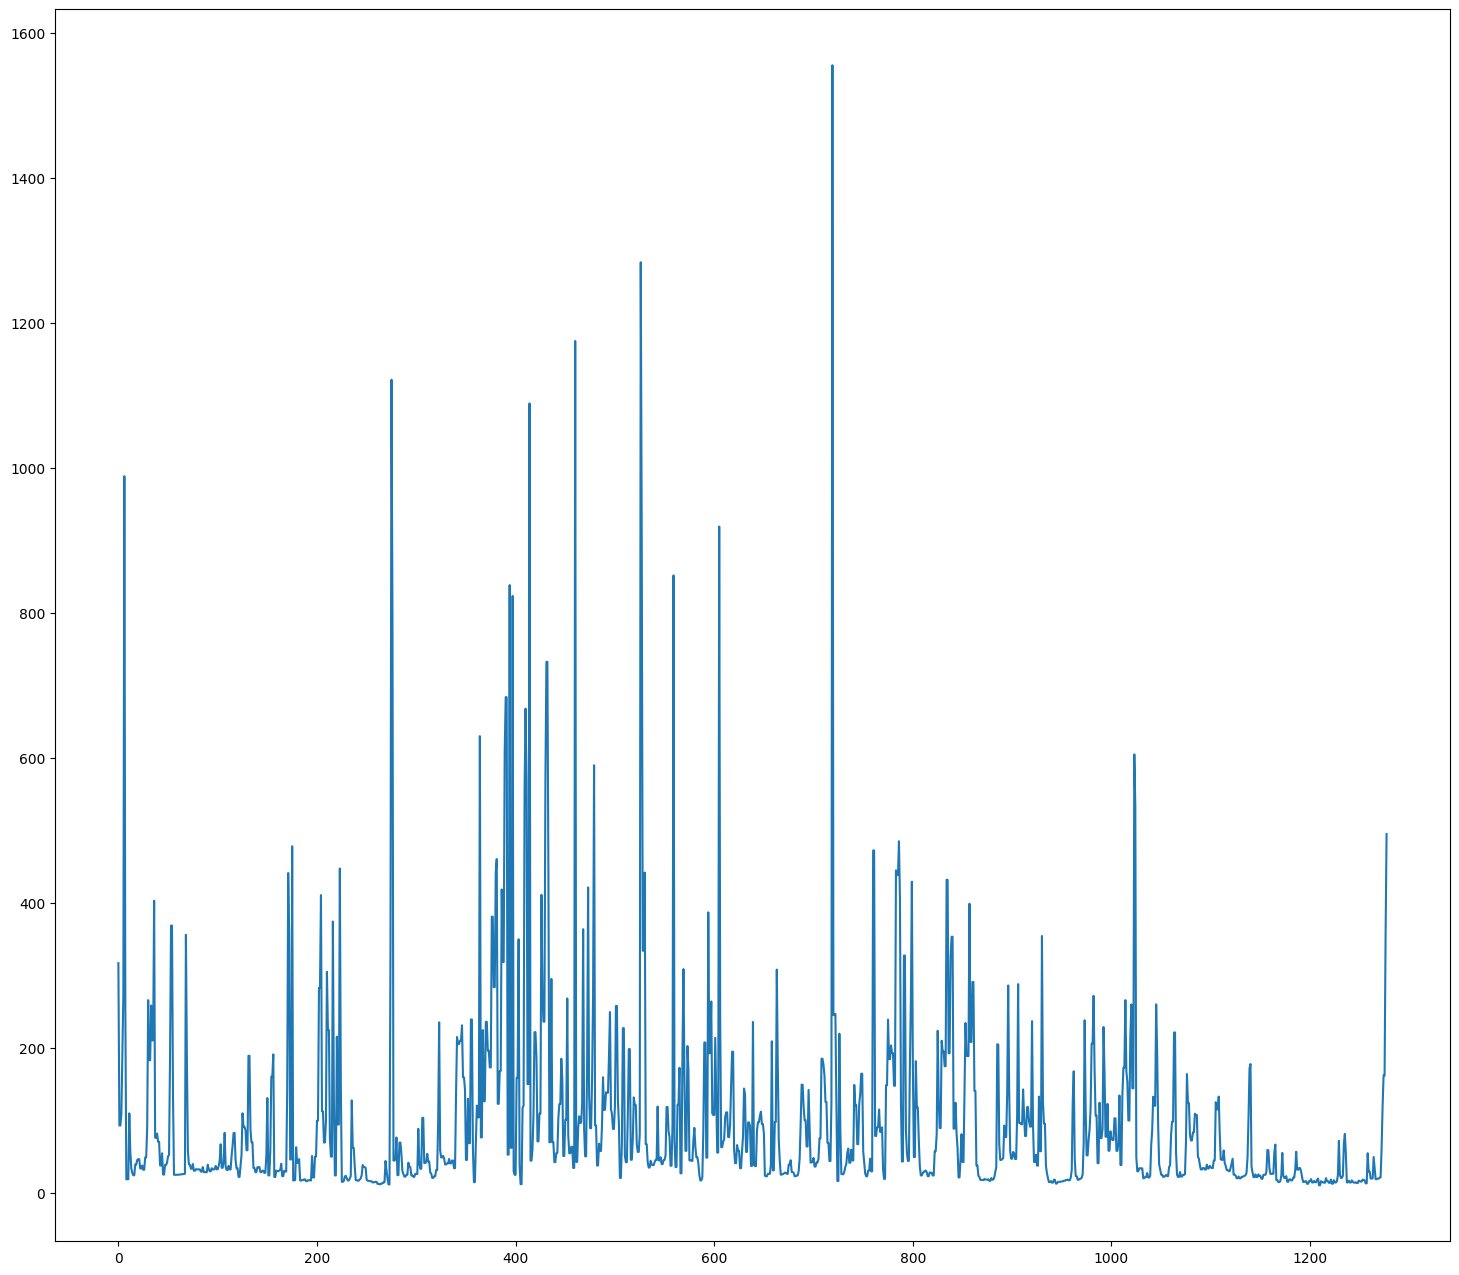

In [11]:
from pandas import Series

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
Series(route.speed_limits).map(lambda x: x.si.value).plot(ax=ax)
plt.show()

<AxesSubplot:xlabel='timedelta'>

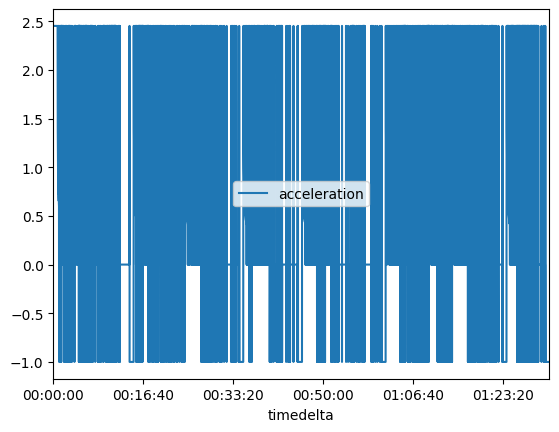

In [12]:
df[["acceleration"]].applymap(lambda x: x.si.value).plot()

<AxesSubplot:xlabel='timedelta'>

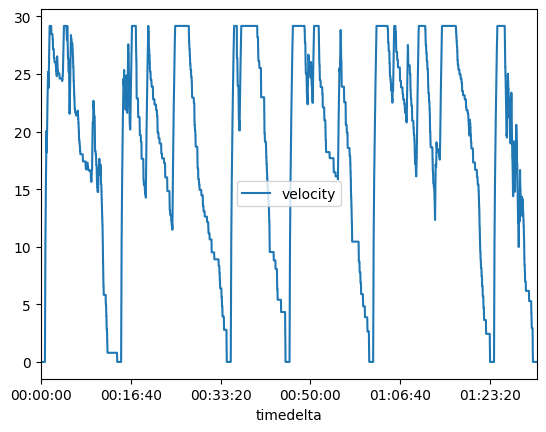

In [13]:
df[["velocity"]].applymap(lambda x: x.si.value).plot()

In [14]:
df[["velocity"]].max().iloc[0].to(units.imperial.mile / units.hour)

<Quantity 65.24397518 mi / h>

<AxesSubplot:xlabel='timedelta'>

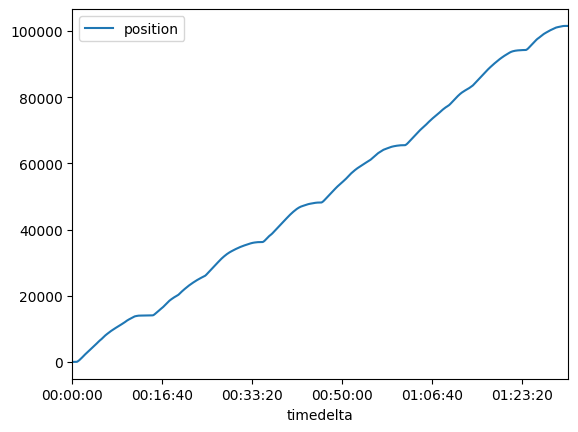

In [15]:
df[["position"]].applymap(lambda x: x.si.value).plot()

In [16]:
import folium
from pyproj import CRS
from shapely.geometry import Point

from dpd.geometry import GeometricDict
from dpd.driving import Stop, Section

gd = GeometricDict(
    {
        "stop1": Stop(Point(-118.38532, 33.90806)),
        "stop2": Stop(Point(-118.39603, 33.89901)),
        "stop3": Stop(Point(-118.39599, 33.88737)),
        "stop4": Stop(Point(-118.39302, 33.86479)),
        "stop5": Stop(Point(-118.39017, 33.85437)),
        "stop6": Stop(Point(-118.39168, 33.84353)),
    },
    crs=CRS.from_epsg(4326),
)

sections = []
for i in range(len(gd) - 1):
    sections.append(
        Section(
            list(gd.values())[i].geometry, list(gd.values())[i + 1].geometry
        ).geometry
    )

route = Route.from_ways(sections, gd.crs)

for stop in gd:
    route.add_stop(gd[stop].geometry, stop)

model = TransportationModel(
    time_unit=units.second / 10,
    agent_reporters=DYNAMIC_BODY_AGENT_REPORTERS
    | {"name": "stop_name", "dwell_time": "dwell_time"},
)

segments = route.segments(dwell_time=45 * units.second)

vehicle = vehicles.vehicle(
    segments=segments,
    model=model,
    unique_id=uuid4(),
    initial_acceleration=mu * g0,
    max_acceleration=mu * g0,
    max_deceleration=1 * units.meter / units.second**2,
    initial_position=0 * units.meter,
    initial_velocity=0 * units.meter / units.second,
)

# trip = route.trip(vehicle, 45 * units.second)
model.schedule.add(vehicle)
model.run()

df = model.get_dataframe()
trip = Trip.from_model(df, route, include_geometry=False)
trip.stops

/usr/local/lib/python3.9/site-packages/dpd/driving/trip.py:109: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  return Trip(GeoDataFrame(df, crs=route.crs)[columns])


timedelta   name            total_time  \
Stop  Arriva/Departure                                                       
stop1 Arrival          0 days 00:00:00.100000  stop1                 0.1 s   
      Departure               0 days 00:00:45  stop1                45.0 s   
stop2 Arrival          0 days 00:02:00.800000  stop2  120.80000000000001 s   
      Departure        0 days 00:02:45.700000  stop2  165.70000000000002 s   
stop3 Arrival          0 days 00:03:59.500000  stop3               239.5 s   
      Departure        0 days 00:04:44.400000  stop3  284.40000000000003 s   
stop4 Arrival          0 days 00:06:42.400000  stop4  402.40000000000003 s   
      Departure        0 days 00:07:27.300000  stop4               447.3 s   
stop5 Arrival          0 days 00:08:37.100000  stop5               517.1 s   
      Departure               0 days 00:09:22  stop5               562.0 s   
stop6 Arrival          0 days 00:10:32.800000  stop6   632.8000000000001 s   
      Departure        0 days 00:11:17.700000  stop6               677.7 s   

                              total_distance  
Stop  Arriva/Departure                        
stop1 Arrival                          0.0 m  
      Departure                        0.0 m  
stop2 Arrival           1414.8288560956162 m  
      Departure         1414.8288560956162 m  
stop3 Arrival           2772.8672382409786 m  
      Departure         2772.8672382409786 m  
stop4 Arrival              5420.0768745609 m  
      Departure            5420.0768745609 m  
stop5 Arrival            6661.265333945174 m  
      Departure          6661.265333945174 m  
stop6 Arrival            7932.785965238628 m  
      Departure          7932.785965238628 m

In [21]:
schedule = Schedule.from_trip(trip)

model = TransportationModel(
    time_unit=units.second / 10,
    agent_reporters=DYNAMIC_BODY_AGENT_REPORTERS
    | {"name": "stop_name", "dwell_time": "dwell_time"},
)

segments = route.reversed.segments(dwell_time=45 * units.second)

vehicle = vehicles.vehicle(
    segments=segments,
    model=model,
    unique_id=uuid4(),
    initial_acceleration=mu * g0,
    max_acceleration=mu * g0,
    max_deceleration=1 * units.meter / units.second**2,
    initial_position=0 * units.meter,
    initial_velocity=0 * units.meter / units.second,
)

model.schedule.add(vehicle)
model.run()

df = model.get_dataframe()
trip_reversed = Trip.from_model(df, route, include_geometry=False)

schedule_reversed = Schedule.from_trip(trip_reversed)
schedule_reversed.reverse_distance()

/usr/local/lib/python3.9/site-packages/dpd/driving/trip.py:109: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  return Trip(GeoDataFrame(df, crs=route.crs)[columns])


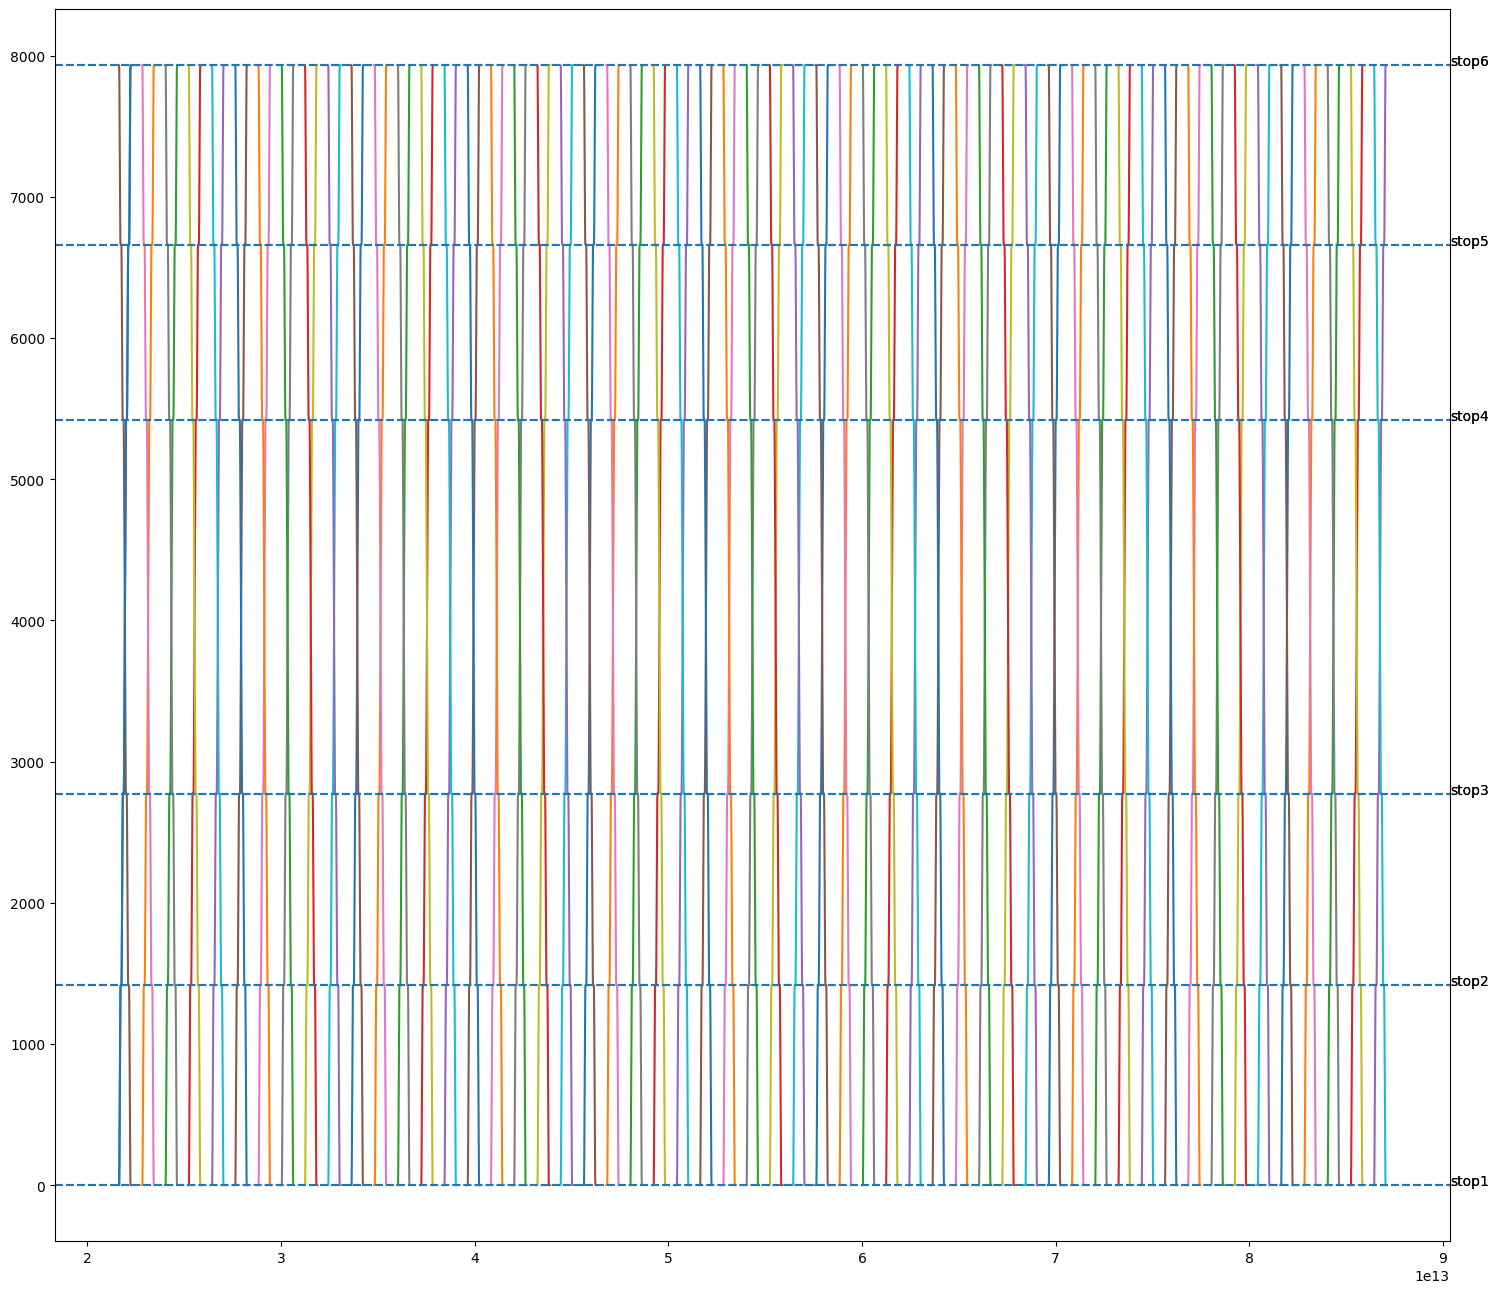

In [22]:
fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
schedule.plot_schedule(ax=ax)
schedule_reversed.plot_schedule(ax=ax)
schedule.trips[list(schedule.trips.keys())[0]].plot_schedule(ax=ax)  # to add labels
plt.show()

In [23]:
schedule.schedule[schedule.schedule.index.isin(["Departure"], level=1)].applymap(
    lambda x: x.round("s")
)

,,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
Stop,Arriva/Departure,,,,,,,,,,,,,,,,,,,,,
stop1,Departure,0 days 06:00:45,0 days 06:20:45,0 days 06:40:45,0 days 07:00:45,0 days 07:20:45,0 days 07:40:45,0 days 08:00:45,0 days 08:20:45,0 days 08:40:45,0 days 09:00:45,...,0 days 21:00:45,0 days 21:20:45,0 days 21:40:45,0 days 22:00:45,0 days 22:20:45,0 days 22:40:45,0 days 23:00:45,0 days 23:20:45,0 days 23:40:45,1 days 00:00:45
stop2,Departure,0 days 06:02:46,0 days 06:22:46,0 days 06:42:46,0 days 07:02:46,0 days 07:22:46,0 days 07:42:46,0 days 08:02:46,0 days 08:22:46,0 days 08:42:46,0 days 09:02:46,...,0 days 21:02:46,0 days 21:22:46,0 days 21:42:46,0 days 22:02:46,0 days 22:22:46,0 days 22:42:46,0 days 23:02:46,0 days 23:22:46,0 days 23:42:46,1 days 00:02:46
stop3,Departure,0 days 06:04:44,0 days 06:24:44,0 days 06:44:44,0 days 07:04:44,0 days 07:24:44,0 days 07:44:44,0 days 08:04:44,0 days 08:24:44,0 days 08:44:44,0 days 09:04:44,...,0 days 21:04:44,0 days 21:24:44,0 days 21:44:44,0 days 22:04:44,0 days 22:24:44,0 days 22:44:44,0 days 23:04:44,0 days 23:24:44,0 days 23:44:44,1 days 00:04:44
stop4,Departure,0 days 06:07:27,0 days 06:27:27,0 days 06:47:27,0 days 07:07:27,0 days 07:27:27,0 days 07:47:27,0 days 08:07:27,0 days 08:27:27,0 days 08:47:27,0 days 09:07:27,...,0 days 21:07:27,0 days 21:27:27,0 days 21:47:27,0 days 22:07:27,0 days 22:27:27,0 days 22:47:27,0 days 23:07:27,0 days 23:27:27,0 days 23:47:27,1 days 00:07:27
stop5,Departure,0 days 06:09:22,0 days 06:29:22,0 days 06:49:22,0 days 07:09:22,0 days 07:29:22,0 days 07:49:22,0 days 08:09:22,0 days 08:29:22,0 days 08:49:22,0 days 09:09:22,...,0 days 21:09:22,0 days 21:29:22,0 days 21:49:22,0 days 22:09:22,0 days 22:29:22,0 days 22:49:22,0 days 23:09:22,0 days 23:29:22,0 days 23:49:22,1 days 00:09:22
stop6,Departure,0 days 06:11:18,0 days 06:31:18,0 days 06:51:18,0 days 07:11:18,0 days 07:31:18,0 days 07:51:18,0 days 08:11:18,0 days 08:31:18,0 days 08:51:18,0 days 09:11:18,...,0 days 21:11:18,0 days 21:31:18,0 days 21:51:18,0 days 22:11:18,0 days 22:31:18,0 days 22:51:18,0 days 23:11:18,0 days 23:31:18,0 days 23:51:18,1 days 00:11:18


In [24]:
import gtfs_kit

feed = gtfs_kit.read_feed(
    "http://www.bart.gov/dev/schedules/google_transit.zip", dist_units="mi"
)

trip = Trip.from_gtfs(feed, trip_id="1371190")
from astropy import units

units.imperial.enable()
trip["total_distance"] = trip.total_distance.map(
    lambda x: (x.value * units.imperial.foot).to(units.meter)
)

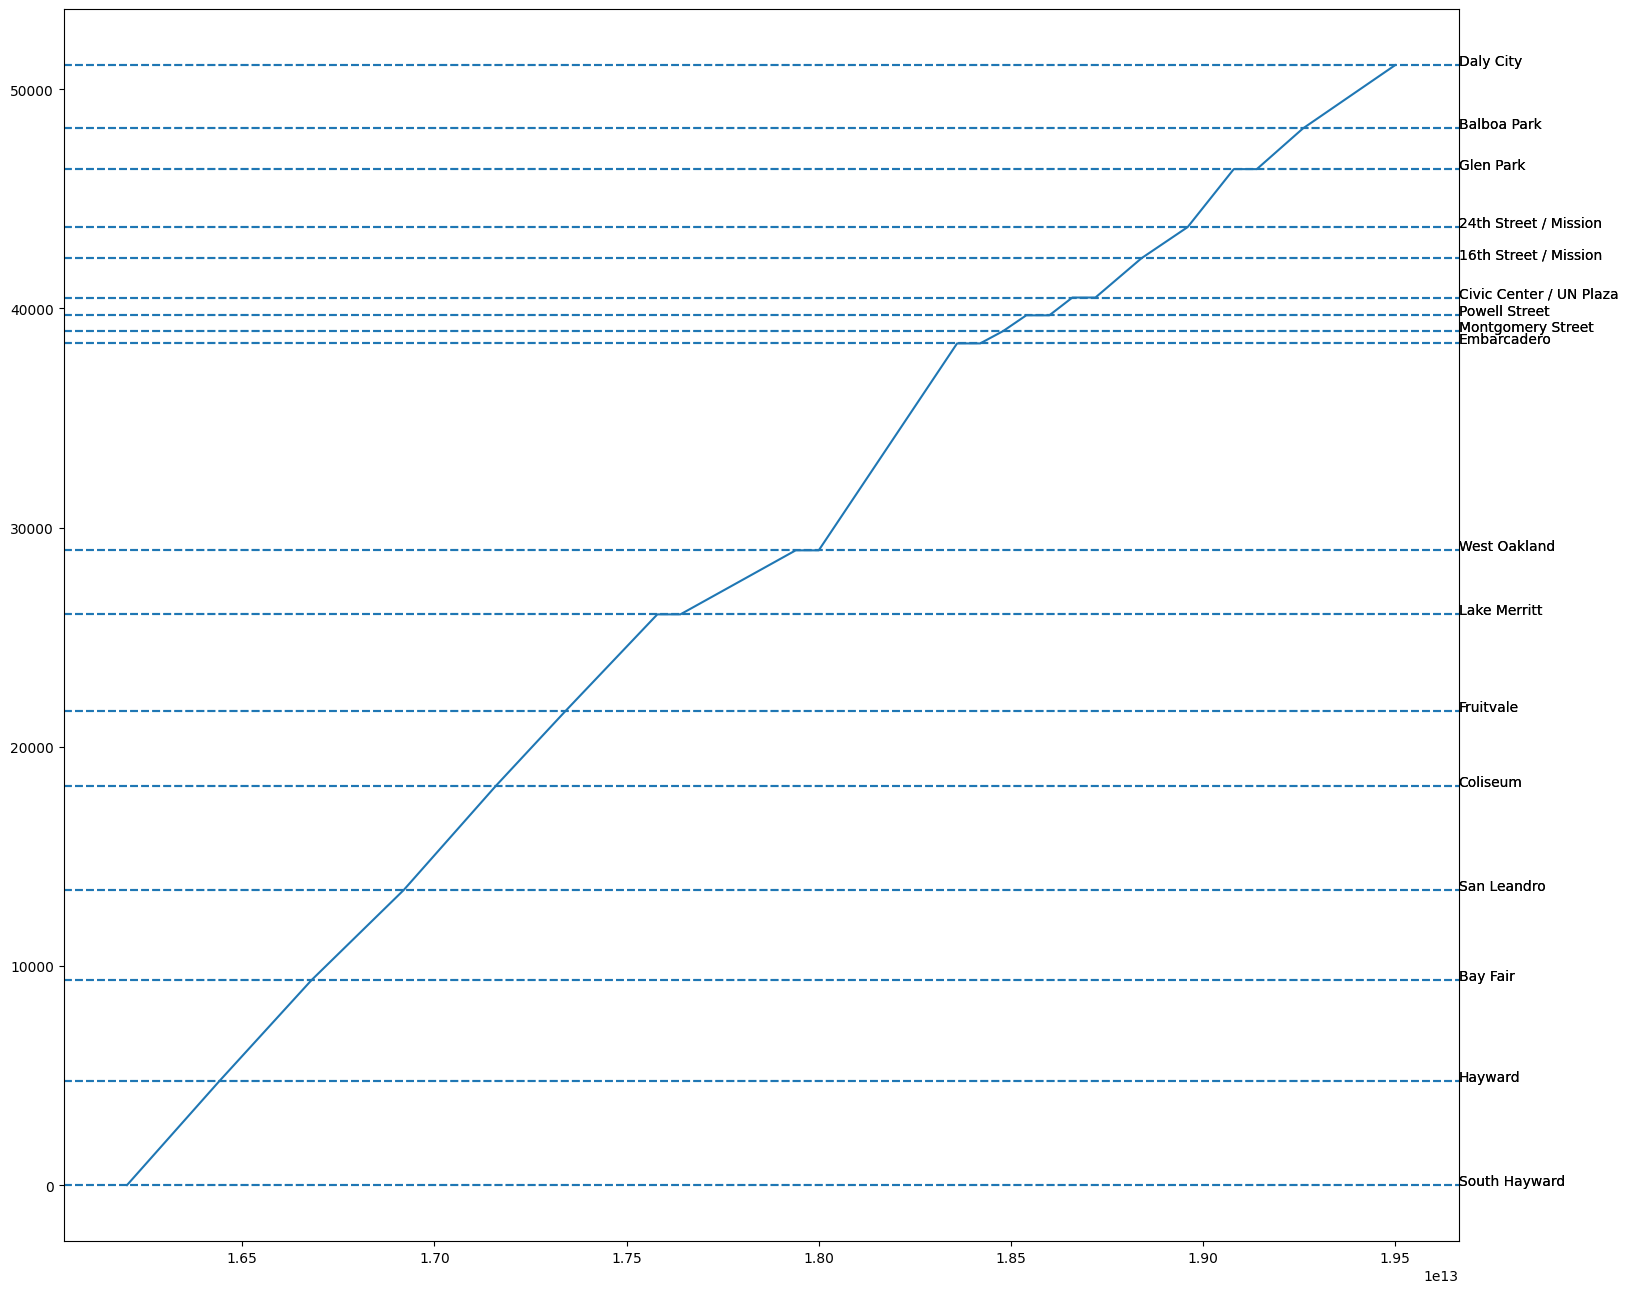

In [25]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
trip.plot_schedule(ax=ax)
plt.show()

In [26]:
schedule = Schedule.from_gtfs(feed, route_id="6", direction_id=0)
schedule_reversed = Schedule.from_gtfs(feed, route_id="5", direction_id=1)

In [27]:
from astropy import units

units.imperial.enable()
for trip_id in schedule.trips:
    trip = schedule.trips[trip_id]
    trip["total_distance"] = trip.total_distance.map(
        lambda x: (x.value * units.imperial.foot).to(units.meter)
    )
for trip_id in schedule_reversed.trips:
    trip = schedule_reversed.trips[trip_id]
    trip["total_distance"] = trip.total_distance.map(
        lambda x: (x.value * units.imperial.foot).to(units.meter)
    )

In [28]:
schedule_reversed.reverse_distance()

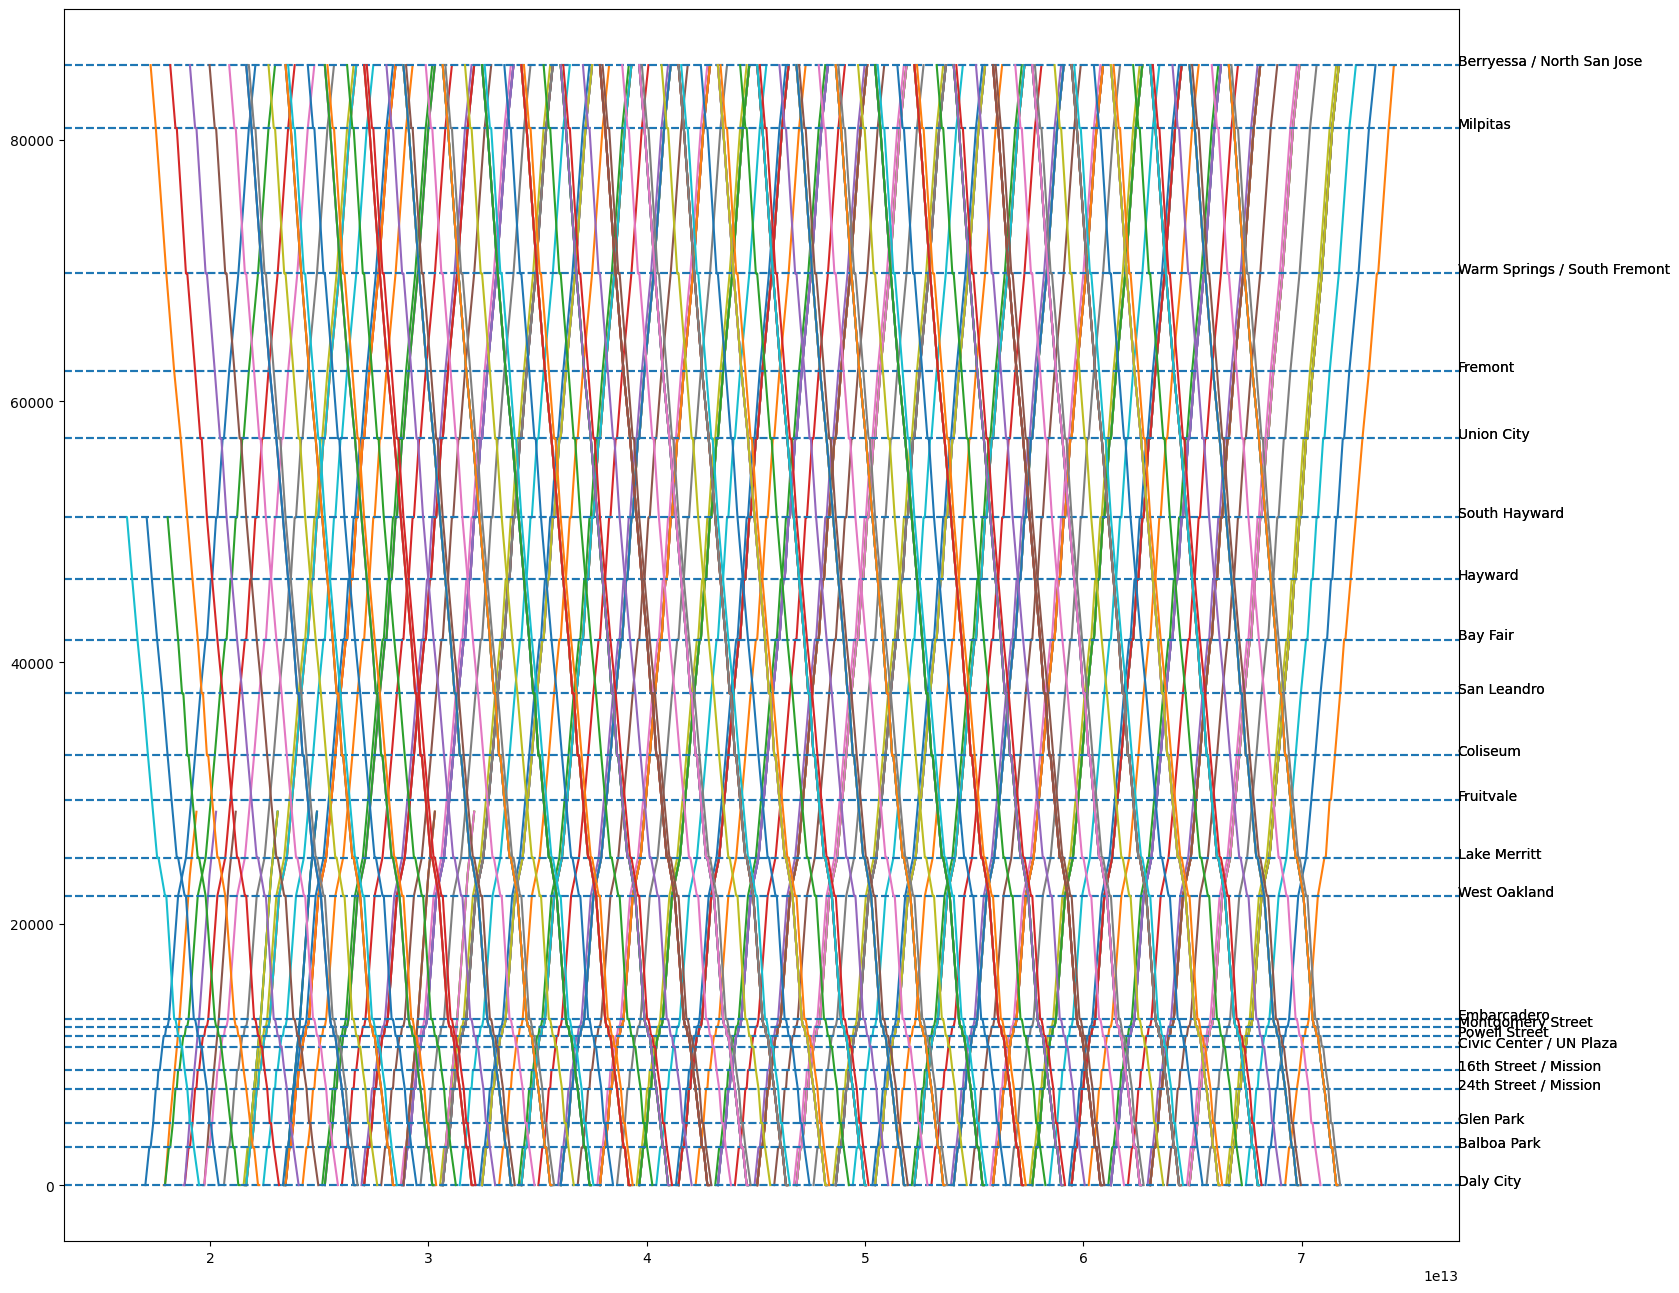

In [29]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
schedule.plot_schedule(ax=ax)
schedule.trips[list(schedule.trips.keys())[-1]].plot_schedule(ax=ax)  # to add labels
schedule_reversed.plot_schedule(ax=ax)
plt.show()

In [30]:
schedule_reversed.schedule

1371190         1371192  \
Stop                         Arriva/Departure                                   
South Hayward                Arrival          0 days 04:30:00 0 days 04:45:00   
                             Departure        0 days 04:30:00 0 days 04:45:00   
Hayward                      Arrival          0 days 04:34:00 0 days 04:49:00   
                             Departure        0 days 04:34:00 0 days 04:49:00   
Bay Fair                     Arrival          0 days 04:38:00 0 days 04:53:00   
                             Departure        0 days 04:38:00 0 days 04:53:00   
San Leandro                  Arrival          0 days 04:42:00 0 days 04:57:00   
                             Departure        0 days 04:42:00 0 days 04:57:00   
Coliseum                     Arrival          0 days 04:46:00 0 days 05:01:00   
                             Departure        0 days 04:46:00 0 days 05:01:00   
Fruitvale                    Arrival          0 days 04:49:00 0 days 05:04:00   
                             Departure        0 days 04:49:00 0 days 05:04:00   
Lake Merritt                 Arrival          0 days 04:53:00 0 days 05:08:00   
                             Departure        0 days 04:54:00 0 days 05:09:00   
West Oakland                 Arrival          0 days 04:59:00 0 days 05:14:00   
                             Departure        0 days 05:00:00 0 days 05:15:00   
Embarcadero                  Arrival          0 days 05:06:00 0 days 05:21:00   
                             Departure        0 days 05:07:00 0 days 05:22:00   
Montgomery Street            Arrival          0 days 05:08:00 0 days 05:23:00   
                             Departure        0 days 05:08:00 0 days 05:23:00   
Powell Street                Arrival          0 days 05:09:00 0 days 05:24:00   
                             Departure        0 days 05:10:00 0 days 05:25:00   
Civic Center / UN Plaza      Arrival          0 days 05:11:00 0 days 05:26:00   
                             Departure        0 days 05:12:00 0 days 05:27:00   
16th Street / Mission        Arrival          0 days 05:14:00 0 days 05:29:00   
                             Departure        0 days 05:14:00 0 days 05:29:00   
24th Street / Mission        Arrival          0 days 05:16:00 0 days 05:31:00   
                             Departure        0 days 05:16:00 0 days 05:31:00   
Glen Park                    Arrival          0 days 05:18:00 0 days 05:33:00   
                             Departure        0 days 05:19:00 0 days 05:34:00   
Balboa Park                  Arrival          0 days 05:21:00 0 days 05:36:00   
                             Departure        0 days 05:21:00 0 days 05:36:00   
Daly City                    Arrival          0 days 05:25:00 0 days 05:40:00   
                             Departure        0 days 05:25:00 0 days 05:40:00   
Berryessa / North San Jose   Arrival                      NaT             NaT   
                             Departure                    NaT             NaT   
Milpitas                     Arrival                      NaT             NaT   
                             Departure                    NaT             NaT   
Warm Springs / South Fremont Arrival                      NaT             NaT   
                             Departure                    NaT             NaT   
Fremont                      Arrival                      NaT             NaT   
                             Departure                    NaT             NaT   
Union City                   Arrival                      NaT             NaT   
                             Departure                    NaT             NaT   

                                                      1371191         1371196  \
Stop                         Arriva/Departure                                   
South Hayward                Arrival          0 days 05:16:00 0 days 05:01:00   
                             Departure        0 days 05:16:00 0 days 05:01:00   
Hay

In [31]:
import gtfs_kit

feed = gtfs_kit.read_feed(
    "http://data.trilliumtransit.com/gtfs/sfbayferry-ca-us/sfbayferry-ca-us.zip",
    dist_units="mi",
)

In [32]:
route = Route.from_gtfs(feed, "11114")

/Users/david/Library/Python/3.9/lib/python/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [33]:
import folium

folium_map = folium.Map()
route.plot_folium(folium_map)
folium_map

In [34]:
ferry_schedule = Schedule.from_gtfs(feed, route_id="11114", direction_id=1)

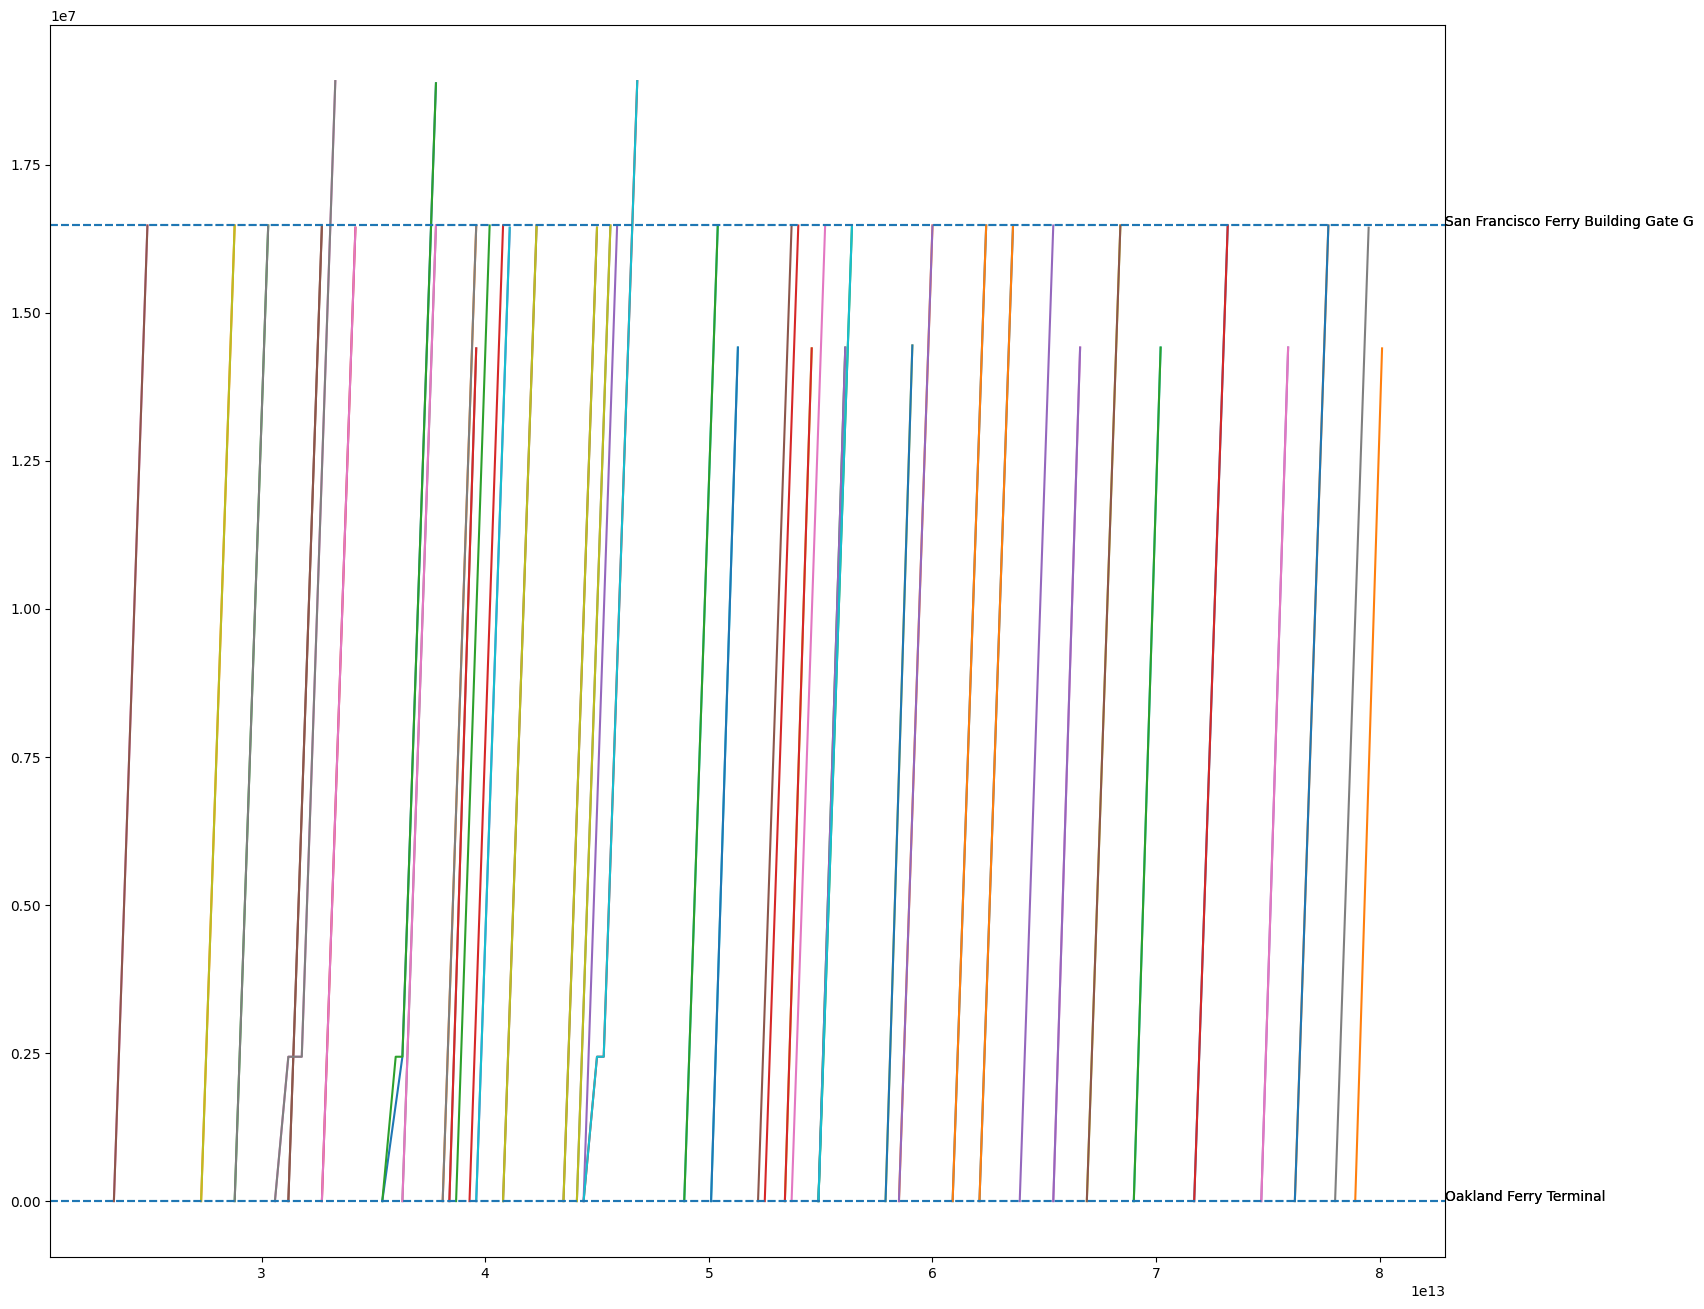

In [35]:
from matplotlib import pyplot as plt

fig = plt.figure(figsize=(18, 16))
ax = fig.add_subplot(111)
ferry_schedule.plot_schedule(ax=ax)
ferry_schedule.trips[list(ferry_schedule.trips.keys())[-1]].plot_schedule(
    ax=ax
)  # to add labels
plt.show()

In [36]:
from pandas import DataFrame


class DrivingRoute(DataFrame):
    def __init__(self, *args, **kwargs):
        super().__init__(columns=["Length", "Speed Limit"], *args, **kwargs)


dr = DrivingRoute(
    data=[
        {
            "Length": 1000 * units.meter,
            "Speed Limit": 100 * units.kilometer / units.hour,
        },
        {
            "Length": 1000 * units.meter,
            "Speed Limit": 200 * units.kilometer / units.hour,
        },
        {
            "Length": 1000 * units.meter,
            "Speed Limit": 100 * units.kilometer / units.hour,
        },
        {
            "Length": 1000 * units.meter,
            "Speed Limit": 200 * units.kilometer / units.hour,
        },
    ]
)
dr

,Length,Speed Limit
0,1000.0 m,100.0 km / h
1,1000.0 m,200.0 km / h
2,1000.0 m,100.0 km / h
3,1000.0 m,200.0 km / h


In [37]:
from dpd.modeling import TransportationModel
from dpd.driving import DynamicBodyDriver
from mesa.datacollection import DataCollector

from dpd.modeling import TransportationModel

# from dpd.mechanics.datacollection import DynamicBodyDataCollector
from dpd.mechanics.datacollection import DYNAMIC_BODY_AGENT_REPORTERS

from astropy.constants import g0

mu = 0.25  # https://railroads.dot.gov/sites/fra.dot.gov/files/fra_net/17468/A%20Survey%20of%20Wheel-Rail%20Friction.pdf
model = TransportationModel(
    time_unit=units.second,
    agent_reporters=DYNAMIC_BODY_AGENT_REPORTERS,
)

b5 = DynamicBodyDriver(
    distances=dr["Length"].map(lambda x: x.value).to_numpy() * units.meter,
    speed_limits=dr["Speed Limit"].map(lambda x: x.value).to_numpy()
    * units.kilometer
    / units.hour,
    power=400 * units.kilowatt,
    mass=36000 * units.kilogram,
    initial_acceleration=mu * g0,
    max_deceleration=1 * units.meter / units.second**2,
    max_acceleration=mu * g0,
    initial_velocity=0 * units.meter / units.second,
    initial_position=0 * units.meter,
    unique_id=uuid4(),
    model=model,
)
model.schedule.add(b5)
b5.begin_next_segment()

model.run()

df = model.datacollector.get_agent_vars_dataframe()

df["acceleration"] = df["acceleration"].map(lambda x: x.si)
df.applymap(lambda x: x.round())

,,position,velocity,acceleration
Step,AgentID,,,
0,71d30e7e-d251-4188-b564-d712ceeef731,0.0 m,0.0 m / s,2.0 m / s2
1,71d30e7e-d251-4188-b564-d712ceeef731,2.0 m,2.0 m / s,2.0 m / s2
2,71d30e7e-d251-4188-b564-d712ceeef731,7.0 m,5.0 m / s,2.0 m / s2
3,71d30e7e-d251-4188-b564-d712ceeef731,15.0 m,7.0 m / s,2.0 m / s2
4,71d30e7e-d251-4188-b564-d712ceeef731,23.0 m,9.0 m / s,2.0 m / s2
...,...,...,...,...
143,71d30e7e-d251-4188-b564-d712ceeef731,3877.0 m,37.0 m / s,0.0 m / s2
144,71d30e7e-d251-4188-b564-d712ceeef731,3914.0 m,37.0 m / s,0.0 m / s2
145,71d30e7e-d251-4188-b564-d712ceeef731,3951.0 m,37.0 m / s,0.0 m / s2


<AxesSubplot:xlabel='Step,AgentID'>

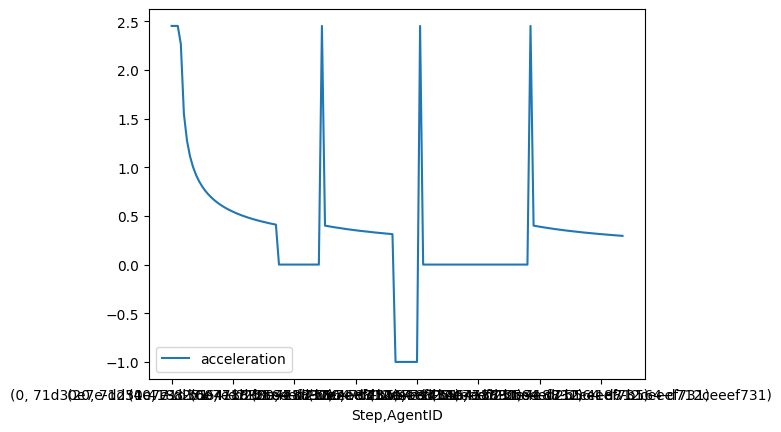

In [38]:
df.applymap(lambda x: x.value)[["acceleration"]].plot()

<AxesSubplot:xlabel='Step,AgentID'>

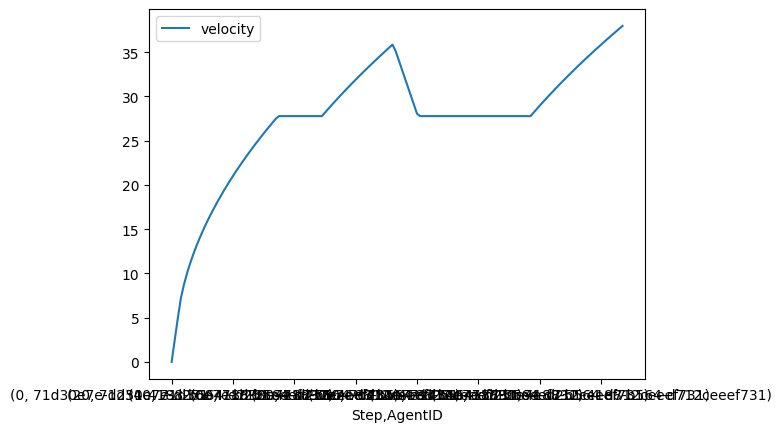

In [39]:
df.applymap(lambda x: x.value)[["velocity"]].plot()

<AxesSubplot:xlabel='Step,AgentID'>

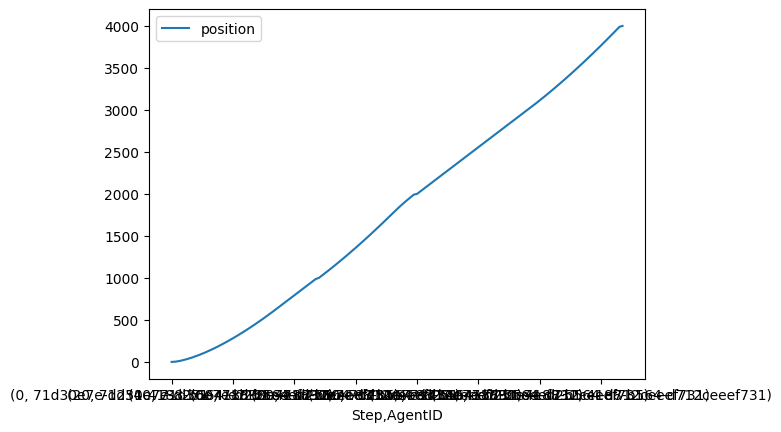

In [40]:
df.applymap(lambda x: x.value)[["position"]].plot()